<a href="https://colab.research.google.com/github/Fantasm4no/Angular/blob/main/KNN_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Librerías

In [1]:
from time import time
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from matplotlib import*
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#from keras.layers import Dropout

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from scipy import stats
import seaborn
from sklearn import set_config
print('Módulos importados')

Módulos importados


# Carga de dataset

In [2]:
#Cargar un dataframe de un archivo local
dataset = "/content/winequality-red.csv"
dfOriginal = pd.read_csv(dataset, sep = ';')

print('cantidad de observaciones (clientes): ',dfOriginal.shape[0])
print('cantidad de variables: ',dfOriginal.shape[1])
print(dfOriginal.shape)
dfOriginal.head()

cantidad de observaciones (clientes):  1599
cantidad de variables:  12
(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Cambio variable de salida

In [3]:
# Transformar la variable de salida 'quality' en binaria
dfOriginal['quality'] = dfOriginal['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Verificar los cambios
print(dfOriginal['quality'].value_counts())
dfOriginal.head(8)


quality
1    855
0    744
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1


In [ ]:
# Transformar los valores de "Panic_Attack_Frequency" en 1 para "YES" y 2 para "NO"
dfOriginal['Therapy'] = dfOriginal['Therapy'].map({'Yes': 1, 'No': 2})

#Se modifica la variable de salida (de estudio): Panic_Attack_Frequency. Es mejor tener la salida en formato binario cuando hay dos clases
dfOriginal['Therapy'] = dfOriginal['Therapy'].replace(2, 0)

# Verificar los cambios
dfOriginal.head()

# Eliminación de variables y separación de variable de salida

In [4]:
dataframe=copy.deepcopy(dfOriginal)
print(dataframe.shape)
#Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independiente "X"
Y=dataframe['quality']
dataframe=dataframe.drop(['quality'], axis=1)
print(dataframe.shape)
dataframe.head()

(1599, 12)
(1599, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Análisis de variables categóricas

In [5]:
# Determinación de tipos de variables

categorical_ordinal_features = []

categorical_nominal_features = []

numeric_features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]



In [6]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  11
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  0
Cantidad de variables que habrá después de la transformación de variables:  11


# Diseño de transformadores

In [7]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

# Diseño de pipeline

In [8]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    #('prepstandard', preprocesorStandardScaler)
    ('prepminmax', preprocesorMinMax)
])

# Transformación de variables

In [9]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn"
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1]
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), [])
********** Lista de variables:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


# Guardar y cargar un Pipeline o Modelo

In [10]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [11]:
guardarPipeline(pipe,'pipePreprocesadores')
pipe=None
pipe=cargarPipeline('pipePreprocesadores')
set_config(display='diagram')
pipe

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as a different type depending on the ColumnTransformer inputs.
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('prepminmax',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tranminmax',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10])]))])

# Análisis de correlación

In [12]:
dfCorrel=copy.deepcopy(dataframeTransformado)
dfCorrel=dfCorrel.corr()
dfCorrel.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494


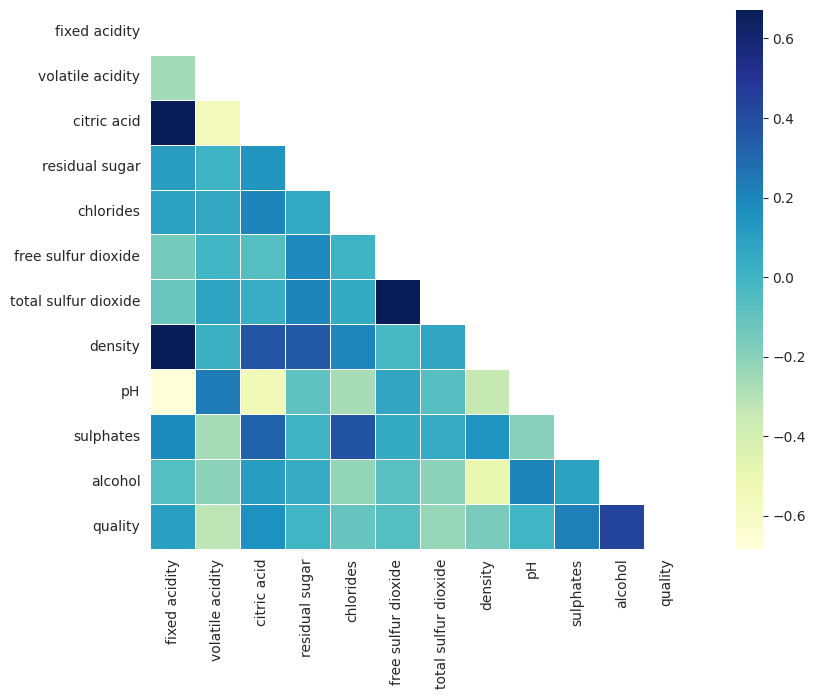

In [13]:
#Generar el mapa de calor de las correlaciones
mask = np.zeros_like(dfCorrel)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 7))
    ax = sns.heatmap(dfCorrel, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
    #ax = sns.heatmap(dfCorrel, cmap ='viridis', linewidths = 0.30, annot = True)
    #ax = sns.heatmap(dfCorrel, cmap ='GnBu', linewidths = 0.30, annot = False)
    #ax = sns.heatmap(dfCorrel, cmap ='YlGnBu', linewidths = 0.30, annot = False)

In [15]:
#Se presenta las variables más correlacionadas positivamente con respecto a la variable de salida
dfCorrOrdenado=dfCorrel.sort_values(by=['quality'], ascending=False)
dfCorrOrdenado['quality'].head(10)

,quality
quality,1.000000
alcohol,0.434751
sulphates,0.218072
citric acid,0.159129
fixed acidity,0.095093
residual sugar,-0.002160
pH,-0.003264
free sulfur dioxide,-0.061757
chlorides,-0.109494
density,-0.159110


In [16]:
#Se presenta las variables más correlacionadas negativamente con respecto a la variable de salida
dfCorrOrdenado=dfCorrel.sort_values(by=['quality'], ascending=True)
dfCorrOrdenado['quality'].head(10)

,quality
volatile acidity,-0.321441
total sulfur dioxide,-0.231963
density,-0.159110
chlorides,-0.109494
free sulfur dioxide,-0.061757
pH,-0.003264
residual sugar,-0.002160
fixed acidity,0.095093
citric acid,0.159129
sulphates,0.218072


# Transformación numérica adicional: Min max scaling

In [17]:
from sklearn import preprocessing
dataframeExtraccion=dataframeTransformado.drop(['quality'], axis=1)

In [18]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(dataframeExtraccion)
print("\nDatos normalizados con escala Min Max:\n")
DataframeTransformado1 = pd.DataFrame(data=data_scaled_minmax,columns=dataframeExtraccion.columns)
DataframeTransformado1 = pd.concat([DataframeTransformado1, dataframeTransformado[['quality']]], axis = 1)
DataframeTransformado1.to_csv("DatasetBancoTransformadoMinMax.csv", sep=";",index = False)
DataframeTransformado1.head()


Datos normalizados con escala Min Max:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


# Transformación numérica adicional: Normalización L1 y L2

In [19]:
#Normalización L1: la suma de los valores absolutos es igual a 1
data_normalized_l1 = preprocessing.normalize(dataframeExtraccion, norm='l1')
#Normalización L2: la suma de los cuadrados es igual a 1
data_normalized_l2 = preprocessing.normalize(dataframeExtraccion, norm='l2')
print("\nDatos normalizados con L2:\n")

DataframeTransformado2 = pd.DataFrame(data=data_normalized_l1,columns=dataframeExtraccion.columns)
DataframeTransformado2 = pd.concat([DataframeTransformado2, dataframeTransformado[['quality']]], axis = 1)
DataframeTransformado2.to_csv("DatasetBancoTransformadoNormL1.csv", sep=";",index = False)
DataframeTransformado2.head()

DataframeTransformado3 = pd.DataFrame(data=data_normalized_l2,columns=dataframeExtraccion.columns)
DataframeTransformado3 = pd.concat([DataframeTransformado3, dataframeTransformado[['quality']]], axis = 1)
DataframeTransformado3.to_csv("DatasetBancoTransformadoNormL2.csv", sep=";",index = False)
DataframeTransformado3.head()


Datos normalizados con L2:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.248124,0.397799,0.000000,0.068586,0.106990,0.141036,0.099074,0.568317,0.607121,0.137911,0.154055,0
1,0.281540,0.517522,0.000000,0.115762,0.142738,0.336063,0.214295,0.491254,0.360099,0.208363,0.214133,0
2,0.302173,0.467748,0.042682,0.102320,0.142511,0.210404,0.180984,0.542926,0.436902,0.204465,0.229826,0
3,0.514873,0.096605,0.493654,0.060378,0.092715,0.198654,0.168206,0.513252,0.291528,0.131965,0.189867,1
4,0.248124,0.397799,0.000000,0.068586,0.106990,0.141036,0.099074,0.568317,0.607121,0.137911,0.154055,0


# Transformación numérica adicional: Estandarización

In [20]:
XEstandarizado = preprocessing.scale(dataframeExtraccion)
print("\nDatos estandarizados:\n")

DataframeTransformado4 = pd.DataFrame(data=XEstandarizado,columns=dataframeExtraccion.columns)
DataframeTransformado4 = pd.concat([DataframeTransformado4, dataframeTransformado[['quality']]], axis = 1)
DataframeTransformado4.to_csv("DatasetBancoTransformadoScale.csv", sep=";",index = False)
DataframeTransformado4.head()


Datos estandarizados:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


# Transformación de nuevos samples

In [21]:
import pandas as pd

# Función para preprocesar nuevos datos
def preprocesarNuevaMuestra(
    fixed_acidity=7.4, volatile_acidity=0.70, citric_acid=0.00, residual_sugar=1.9, chlorides=0.076,
    free_sulfur_dioxide=11.0, total_sulfur_dioxide=34.0, density=0.9978, pH=3.51,
    sulphates=0.56, alcohol=9.4):

    # Definir los nombres de las columnas
    cnames = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
        'sulphates', 'alcohol'
    ]

    # Crear una lista con los valores proporcionados
    Xnew = [
        fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
        free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol
    ]

    # Convertir los datos a un DataFrame
    Xnew_Dataframe = pd.DataFrame(data=[Xnew], columns=cnames)

    # Realizar el preprocesamiento (escalado u otras transformaciones)
    if 'scaler' in globals():  # Si existe un escalador definido
        Xnew_Preprocesado = scaler.transform(Xnew_Dataframe)
    else:
        Xnew_Preprocesado = Xnew_Dataframe  # Si no hay escalador, devolver el DataFrame original

    return Xnew_Preprocesado


# Datos de un nuevo vino
Xnew_Preprocesado = preprocesarNuevaMuestra(
    fixed_acidity=7.4, volatile_acidity=0.70, citric_acid=0.00, residual_sugar=1.9, chlorides=0.076,
    free_sulfur_dioxide=11.0, total_sulfur_dioxide=34.0, density=0.9978, pH=3.51,
    sulphates=0.56, alcohol=9.4
)

# Mostrar el resultado preprocesado
Xnew_Preprocesado


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  


# Fase 2: Clasificación con el algoritmo KNN, evaluación y optimización

In [22]:
dataframeTransformado=pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")
dataframeTransformado['quality'] = dataframeTransformado['quality'].replace(2, 0)
print(dataframeTransformado.shape)
dataframeTransformado.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


In [23]:
# Función para guardar un modelo
def guardarModelo(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("********** Pickle guardado")

# Función para transformar la predicción
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio=lista[i]
        #print(desempenio)
        if (desempenio < 0.5):
            desempenio = 0
        elif (desempenio >= 0.5):
            desempenio = 1
        lista[i]=desempenio
    return lista

In [24]:
Y = dataframeTransformado['quality']
dataframeTransformado=dataframeTransformado.drop(['quality'], axis=1)
X_Transformado=dataframeTransformado.values
X_Transformado

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

# Diseño y optimización

In [25]:
# Define tu propia función de distancia personalizada
def distancia_personalizada(x, y):
    # Por ejemplo, aquí utilizamos la distancia Euclidiana con un peso especial
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) * 0.5

In [26]:
# Crear un DataFrame vacío con las columnas deseadas
columnas = ['DISTANCE','K','ACC','PRECISION','RECALL','F1-SCORE']
# Definr el tipo de dato de cada columna
tipos_de_variable = [str, int, float, float, float, float]
# Crear un dataframe vacío, a este dataframe se agregarán fila a fila los resultados de KNN
dataResultados = pd.DataFrame(columns=columnas)
model=None
# Definir las distancias a calcular
DISTANCE=[
    'euclidean', 'manhattan', 'chebyshev', 'minkowski', 'canberra', 'braycurtis',
    'cosine', 'hamming', 'propia']
# Definir los valores de K (la cantidad de vecinos que conforman el vecindario)
K= range(1, 26)
valoresK=K
# Definir la cantidad de experimentos que se repiten por cada valor de K. Luego, se calculará el promedio de nExperimentos
nExperimentos=5
for idexp in range(nExperimentos):
    # Crear las particiones del conjunto de datos. De manera convencional, el conjunto de test contiene el 20% de los datos.
    X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
    for d in DISTANCE:
        for k in K:
            # Llamar a la función personalizada
            if d=='propia':
                model=KNeighborsClassifier(n_neighbors=k, metric=distancia_personalizada)
            else:
                model=KNeighborsClassifier(n_neighbors=k, metric=d)#clásicas: euclidean,manhattan,minkowski,chebyshev
            # Entrenar el modelo
            history = model.fit(X_train, y_train)
            # Calcular predicciones para el conjunto de Test
            y_pred = model.predict(X_test)
            y_pred = y_pred.flatten()
            # Transformar salida continua a discreta (binaria)
            y_pred = transformarPrediccion(y_pred)
            # Evaluar el modelo con medidas de calidad
            MAE=metrics.mean_absolute_error(y_test, y_pred)
            MSE=metrics.mean_squared_error(y_test, y_pred)
            RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            y_testBinario = (y_test >= 0.5).astype("int32")
            y_predBinario = (y_pred >= 0.5).astype("int32")
            ACC=float(str(accuracy_score(y_testBinario, y_predBinario)))
            precision=precision_score(y_testBinario, y_predBinario)
            recall=recall_score(y_testBinario, y_predBinario)
            f1=f1_score(y_testBinario, y_predBinario)
            MAE=float(str(round(MAE, 4)))
            MSE=float(str(round(MSE, 4)))
            RMSE=float(str(round(RMSE, 4)))
            precision=float(str(round(precision, 4)))
            recall=float(str(round(recall, 4)))
            f1=float(str(round(f1, 4)))
            valor=[d,k,ACC,precision,recall,f1]
            # print(valor)
            fila = pd.Series(valor, index=columnas)
            # Agregar los resultados en el dataframe
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)
# Convertir el tipo de datos de cada columna
dataResultados['K'] = dataResultados['K'].astype(int)
dataResultados['ACC'] = dataResultados['ACC'].astype(float)
dataResultados['PRECISION'] = dataResultados['PRECISION'].astype(float)
dataResultados['RECALL'] = dataResultados['RECALL'].astype(float)
dataResultados['F1-SCORE'] = dataResultados['F1-SCORE'].astype(float)
dataResultados = dataResultados.sort_values(by=['DISTANCE','ACC'])
dataResultados = dataResultados.reset_index(drop=True)
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,braycurtis,1,0.771875,0.7429,0.8228,0.7808
1,braycurtis,1,0.743750,0.6886,0.7931,0.7372
2,braycurtis,1,0.775000,0.7816,0.8000,0.7907
3,braycurtis,1,0.759375,0.7895,0.7670,0.7781
4,braycurtis,1,0.768750,0.7919,0.7829,0.7874
5,braycurtis,2,0.740625,0.7907,0.6456,0.7108
6,braycurtis,2,0.762500,0.7717,0.6759,0.7206
7,braycurtis,2,0.746875,0.8618,0.6235,0.7235
8,braycurtis,2,0.725000,0.8860,0.5739,0.6966
9,braycurtis,2,0.709375,0.8254,0.5943,0.6910


# Filtro de resultados

In [27]:
#Filtrar por algunos valores de k
valoresK= range(1, 26)
#Nmin=10
#Nmax=40
#dataResultados=dataResultados.loc[(dataResultados['K'] >= Nmin) & (dataResultados['K'] <= Nmax)]
dataResultados=dataResultados.loc[(dataResultados['K'].isin(valoresK))]
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,braycurtis,1,0.771875,0.7429,0.8228,0.7808
1,braycurtis,1,0.743750,0.6886,0.7931,0.7372
2,braycurtis,1,0.775000,0.7816,0.8000,0.7907
3,braycurtis,1,0.759375,0.7895,0.7670,0.7781
4,braycurtis,1,0.768750,0.7919,0.7829,0.7874
5,braycurtis,2,0.740625,0.7907,0.6456,0.7108
6,braycurtis,2,0.762500,0.7717,0.6759,0.7206
7,braycurtis,2,0.746875,0.8618,0.6235,0.7235
8,braycurtis,2,0.725000,0.8860,0.5739,0.6966
9,braycurtis,2,0.709375,0.8254,0.5943,0.6910


# Agrupar resultados por medida de distancia y cantidad de vecinos (K)

In [28]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,braycurtis,1,0.771875,0.7429,0.8228,0.7808
1,braycurtis,1,0.743750,0.6886,0.7931,0.7372
2,braycurtis,1,0.775000,0.7816,0.8000,0.7907
3,braycurtis,1,0.759375,0.7895,0.7670,0.7781
4,braycurtis,1,0.768750,0.7919,0.7829,0.7874
...,...,...,...,...,...,...
1120,propia,25,0.678125,0.6571,0.7278,0.6907
1121,propia,25,0.637500,0.5792,0.7310,0.6463
1122,propia,25,0.687500,0.6786,0.7824,0.7268
1123,propia,25,0.643750,0.6722,0.6875,0.6798


In [29]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,braycurtis,1,0.763750,0.75890,0.79316,0.77484
1,braycurtis,2,0.736875,0.82712,0.62264,0.70850
2,braycurtis,3,0.738125,0.73322,0.77252,0.75144
3,braycurtis,4,0.733125,0.77774,0.67620,0.72220
4,braycurtis,5,0.720000,0.71150,0.76808,0.73760
25,canberra,1,0.761875,0.76330,0.77788,0.76988
26,canberra,2,0.734375,0.82382,0.61380,0.70298
27,canberra,3,0.726250,0.72280,0.75672,0.73910
28,canberra,4,0.731875,0.77844,0.67272,0.72056
29,canberra,5,0.725000,0.71746,0.77010,0.74158


# Visualización de resultados

<ipython-input-30-74bb561a8008>:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  group = dataResultados.get_group(name)


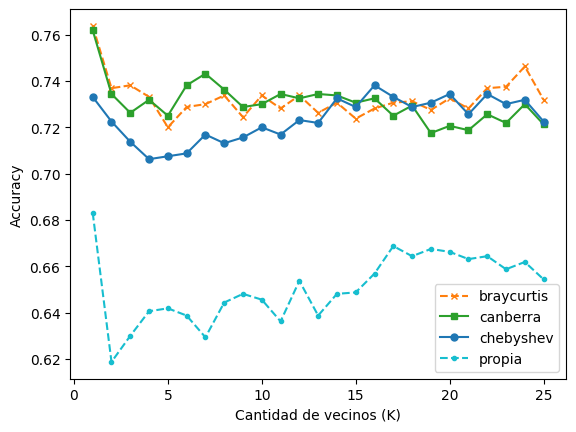

In [30]:
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #SIN EFECTO SUAVIZADO
    if name=='braycurtis': plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label = name)
    if name=='canberra': plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label = name)
    if name=='propia': plt.plot(valoresK, valores, marker='o', linestyle='--', color='C9', ms=3, label = name)
    if name=='chebyshev': plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label = name)
    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")

<ipython-input-31-78dbf040fdd3>:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  group = dataResultados.get_group(name)


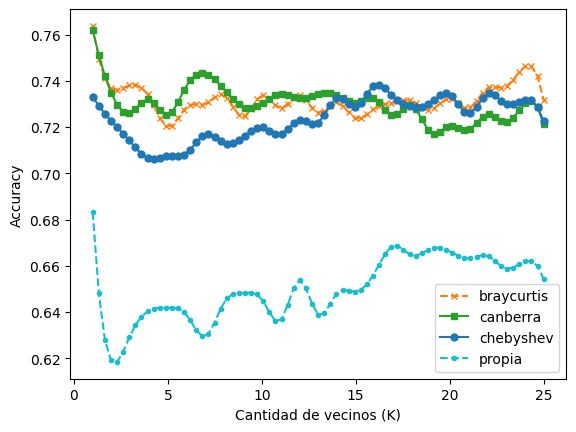

In [31]:
from scipy.interpolate import make_interp_spline, BSpline
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESIÓN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos=len(valoresK)*3  #representa el número de puntos para generar entre T.min and T.max
    xnew = np.linspace(min(valoresK),max(valoresK),numeroPuntos) #linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3) #BSpline object
    power_smooth = spl(xnew)
    if name=='braycurtis': plt.plot(xnew, power_smooth, marker='x', linestyle='--', color='C1', ms=5, label = name)
    if name=='canberra': plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label = name)
    if name=='propia': plt.plot(xnew, power_smooth, marker='o', linestyle='--', color='C9', ms=3, label = name)
    if name=='chebyshev': plt.plot(xnew, power_smooth, marker='.', linestyle='-', color='C0', ms=10, label = name)

    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")

# Diseño y entrenamiento del modelo optimizado

In [32]:
#Construcción de modelo KNN
model=KNeighborsRegressor(n_neighbors=25, metric='braycurtis')#euclidean,manhattan,minkowski,chebyshev
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
history = model.fit(X_train, y_train)
print('Modelo entrenado')
#Se guarda el modelo entrenado
guardarModelo(model,'modeloKNN')
print('Modelo Optimizado Guardado')

(1279, 11) (1279,)
(320, 11) (320,)
Modelo entrenado
********** Pickle guardado
Modelo Optimizado Guardado


# Predicción con el conjunto de Test

In [33]:
#Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = transformarPrediccion(y_pred)
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción clase': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

,real,predicción clase
277,1,1.0
40,0,0.0
194,0,1.0
1209,1,1.0
1451,1,1.0
797,1,1.0
105,0,0.0
1018,1,1.0
272,0,1.0
531,0,1.0


#Evaluación de la calidad del modelo

Mean Absolute Error (MAE): 0.2656
Mean Squared Error (MSE): 0.2656
Root Mean Squared Error (RMSE): 0.5154
Accuracy: 0.734375
Precision:  0.7186
Recall:  0.8314
F1: 0.7709
Matriz de confusión:
Verdaderos negativos:  92  Falsos positivos:  56  Falsos negativos:  29  Verdaderos positivos:  143


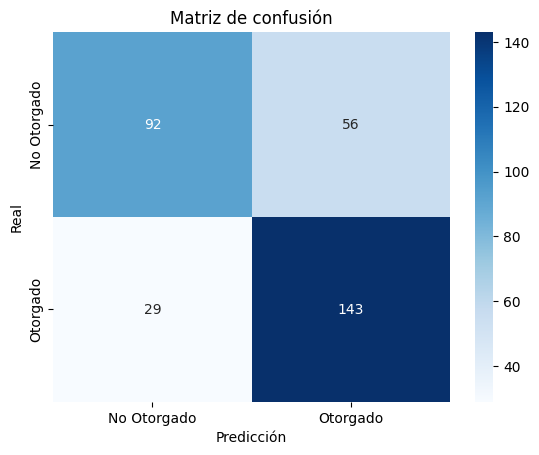

In [34]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase)

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix
labels = ['No Otorgado', 'Otorgado']
cm = confusion_matrix(y_testBinario, y_predBinario)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real');
ax.set_title('Matriz de confusión');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

#Fase 3: Predicción de nuevos samples (clientes)

In [42]:
# Se carga el pipeline de transformación
def cargarPipeline(nombreArchivo):
    """Carga el pipeline de preprocesamiento desde un archivo pickle."""
    try:
        with open(nombreArchivo + '.pickle', 'rb') as handle:
            pipeline = pickle.load(handle)
        return pipeline
    except FileNotFoundError:
        raise FileNotFoundError(f"El archivo {nombreArchivo}.pickle no fue encontrado.")
    except Exception as e:
        raise RuntimeError(f"Error al cargar el pipeline: {e}")

# Se carga el modelo entrenado
def cargarModelo(nombreArchivo):
    """Carga el modelo entrenado desde un archivo pickle."""
    try:
        with open(nombreArchivo + '.pickle', 'rb') as handle:
            modelo = pickle.load(handle)
        return modelo
    except FileNotFoundError:
        raise FileNotFoundError(f"El archivo {nombreArchivo}.pickle no fue encontrado.")
    except Exception as e:
        raise RuntimeError(f"Error al cargar el modelo: {e}")

# Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    """
    Calcula las etiquetas de resultado y la certeza asociada a las predicciones del modelo.
    """
    predicciones = lista
    marcas = []
    certezas = []
    nuevomax = 1
    nuevomin = 0

    for prediccion in predicciones:
        if prediccion < 0.6:  # Umbral ajustado a 0.6
            marca = 'Mala Calidad'
            maxa = 0.5
            mina = 0
            certeza = 1 - ((prediccion - mina) / (maxa - mina) * (nuevomax - nuevomin) + nuevomin)
            certeza = f"{int(certeza * 100)}%"
        else:
            marca = 'Buena Calidad'
            maxa = 1
            mina = 0.5
            certeza = (prediccion - mina) / (maxa - mina) * (nuevomax - nuevomin) + nuevomin
            certeza = f"{int(certeza * 100)}%"

        marcas.append(marca)
        certezas.append(certeza)

    return predicciones, marcas, certezas

def predecirNuevaMuestra(sample):
    """
    Realiza la predicción para un nuevo cliente basado en el pipeline y el modelo entrenado.
    """
    # Definir las columnas esperadas por el pipeline
    cnames = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
    ]

    # Validar que el sample tenga el mismo número de columnas que las esperadas
    if len(sample) != len(cnames):
        raise ValueError(f"El número de columnas en el sample ({len(sample)}) no coincide con el esperado ({len(cnames)}).")

    # Convertir el sample en un DataFrame
    Xnew_Dataframe = pd.DataFrame(data=[sample], columns=cnames)

    # Cargar el pipeline de preprocesamiento
    pipe = cargarPipeline("pipePreprocesadores")
    Xnew_Transformado = pipe.transform(Xnew_Dataframe)

    # Cargar el modelo entrenado
    modelo = cargarModelo("modeloKNN")
    y_pred = modelo.predict(Xnew_Transformado)

    # Obtener los resultados y certezas
    predicciones, marcas, certezas = obtenerResultadosyCertezas(y_pred)

    # Crear el DataFrame final con las predicciones
    dataframeFinal = pd.DataFrame({
        'Predicción': predicciones,
        'Resultado': marcas,
        'Certeza': certezas
    })

    return dataframeFinal


# Sample corregido (valores válidos según las categorías aprendidas por el pipeline)
# Include a value for Panic_Score
sample = [
    7.4, 0.70, 0.00, 1.9, 0.076,  # 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    11.0, 34.0, 0.9978, 3.51, 0.56, 9.4  # 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

In [43]:
dataframeFinal=predecirNuevaMuestra(sample)
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.36,Mala Calidad,28%


In [45]:
# Sample corregido (valores válidos según las categorías aprendidas por el pipeline)
sample = [
    7.3, 0.65, 0.00, 1.2, 0.065,  # 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    15, 21, 0.9946, 3.39, 0.47, 10  # 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

dataframeFinal=predecirNuevaMuestra(sample)
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.64,Buena Calidad,28%


#NAIVE BAYES

#Librerías

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Separación de Datos

In [48]:
# X_Transformado: Matriz con las características preprocesadas
# Y: Variable de salida binaria
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size=0.2, random_state=42)

# Crear el modelo Naive Bayes

In [49]:
# Crear el modelo Naive Bayes
modelo_nb = GaussianNB()

# Entrenar el modelo con el conjunto de entrenamiento
modelo_nb.fit(X_train, y_train)


GaussianNB()

In [50]:
# Realizar predicciones
y_pred_nb = modelo_nb.predict(X_test)

# Métricas Naive Bayes

In [51]:
# Calcular métricas de rendimiento
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Mostrar las métricas
print("Métricas del Modelo Naive Bayes:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")


Métricas del Modelo Naive Bayes:
Accuracy: 0.7344
Precision: 0.7582
Recall: 0.7709
F1-Score: 0.7645


#Matriz de Confusión Naive Bayes

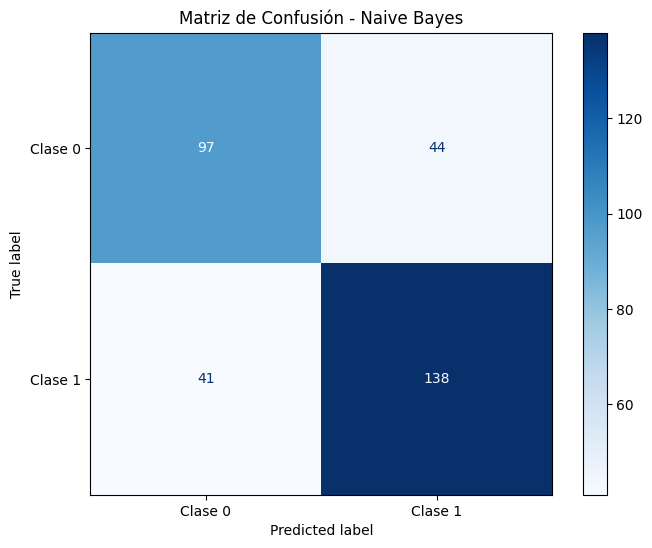

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred_nb)

# Crear el gráfico de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Clase 0', 'Clase 1'])

# Configurar el estilo del gráfico
fig, ax = plt.subplots(figsize=(8, 6))  # Ajustar el tamaño del gráfico
disp.plot(cmap='Blues', ax=ax, values_format='d')  # Formato entero para los valores
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


# Comparación de Resultados KNN - NaiveBayes

In [53]:
# Resultados de ambos modelos
resultados = {
    "Modelo": ["KNN", "Naive Bayes"],
    "Accuracy": [accuracyModeloBase, accuracy_nb],
    "Precision": [precision, precision_nb],
    "Recall": [recall, recall_nb],
    "F1-Score": [f1, f1_nb]
}

# Crear tabla de resultados
import pandas as pd
tabla_resultados = pd.DataFrame(resultados)
print("\nComparación de Modelos:")
print(tabla_resultados)



Comparación de Modelos:
        Modelo  Accuracy Precision   Recall  F1-Score
0          KNN  0.734375    0.7186   0.8314    0.7709
1  Naive Bayes  0.734375  0.758242  0.77095  0.764543
